In [1]:
import pandas as pd
import numpy as np

In [2]:
def confusion_values(df):
    labels = df["label"].values
    pred = df["pred_verify"].values
    
    # y axis is label
    # x axis is pred
    
    tp = 0
    fp = 0
    fn = 0
    tn = 0

    
    for i in range(len(labels)):
        cur_l = labels[i]
        cur_p = pred[i]
        
        if cur_l == cur_p:
            if cur_l == 1:
                tp += 1
            else:
                tn += 1
        else:
            if cur_l == 1:
                fn += 1
            else:
                fp += 1
    
    return np.array([[tp,fp], [fn,tn]])

In [3]:
def tpr_tnr(conf):
    tpr = conf[0][0] / (conf[0][0] + conf[1][0])
    tnr = conf[1][1] / (conf[0][1] + conf[1][1])
    return tpr, tnr

In [4]:
file = "albert_blank_best_output_model_2.csv"
df_albert_blank = pd.read_csv("best_output/%s" % (file))

file = "albert_noans_best_output_model_2.csv"
df_albert_noans = pd.read_csv("best_output/%s" % (file))

file = "roberta_blank_best_output_model_2.csv"
df_roberta_blank = pd.read_csv("best_output/%s" % (file))

file = "roberta_noans_best_output_model_2.csv"
df_roberta_noans = pd.read_csv("best_output/%s" % (file))

In [16]:
albert_blank_conf = confusion_values(df_albert_blank)
print("albert_blank_conf")
print(albert_blank_conf)
print(tpr_tnr(albert_blank_conf))
albert_noans_conf = confusion_values(df_albert_noans)
print("\nalbert_noans_conf")
print(albert_noans_conf)
print(tpr_tnr(albert_noans_conf))
roberta_noans_conf = confusion_values(df_roberta_blank)
print("\nroberta_noans_conf")
print(roberta_noans_conf)
print(tpr_tnr(roberta_noans_conf))
roberta_blank_conf = confusion_values(df_roberta_noans)
print("\nroberta_blank_conf")
print(roberta_blank_conf)
print(tpr_tnr(roberta_blank_conf))

albert_blank_conf
[[1144  743]
 [ 722 1137]]
(0.6130760986066452, 0.6047872340425532)

albert_noans_conf
[[1056  817]
 [ 810 1063]]
(0.5659163987138264, 0.5654255319148936)

roberta_noans_conf
[[1298  565]
 [ 567 1316]]
(0.6959785522788203, 0.6996278575225944)

roberta_blank_conf
[[1194  602]
 [ 672 1279]]
(0.639871382636656, 0.6799574694311536)


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

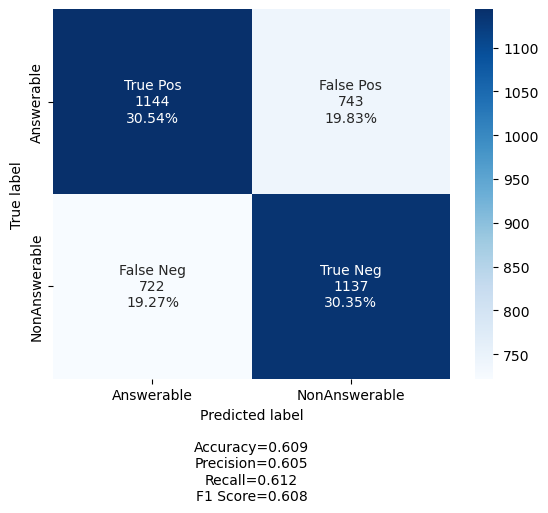

In [11]:
labels = ['True Pos','False Pos','False Neg','True Neg']
categories = ['Answerable', 'NonAnswerable']
make_confusion_matrix(albert_blank_conf, 
                      group_names=labels,
                      categories=categories)

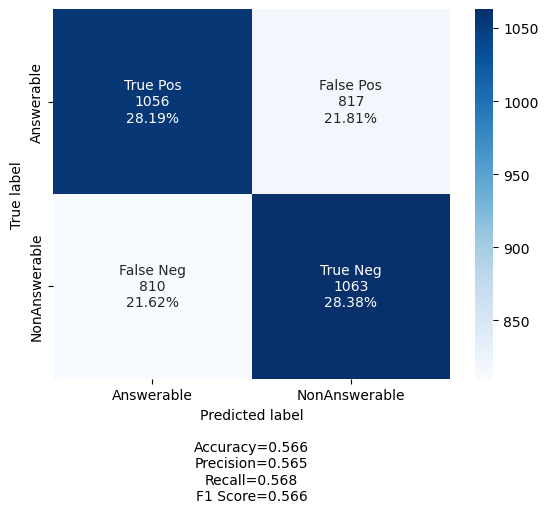

In [12]:
labels = ['True Pos','False Pos','False Neg','True Neg']
categories = ['Answerable', 'NonAnswerable']
make_confusion_matrix(albert_noans_conf, 
                      group_names=labels,
                      categories=categories)

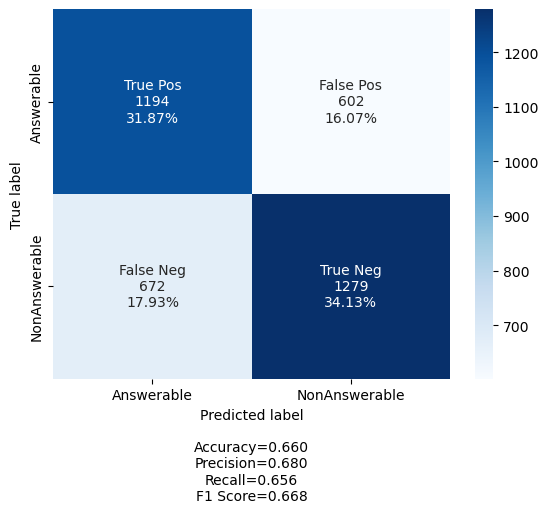

In [13]:
labels = ['True Pos','False Pos','False Neg','True Neg']
categories = ['Answerable', 'NonAnswerable']
make_confusion_matrix(roberta_blank_conf, 
                      group_names=labels,
                      categories=categories)

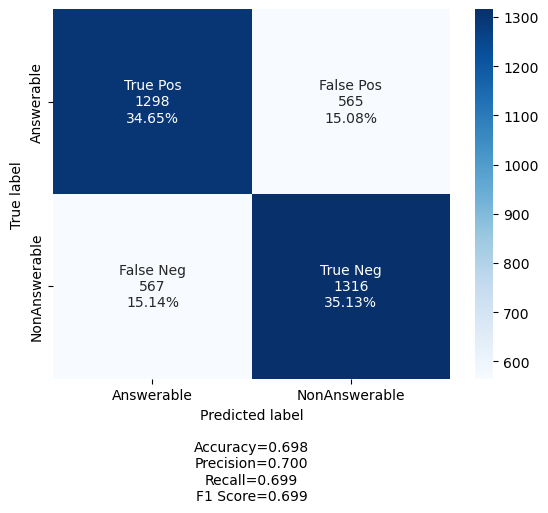

In [14]:
labels = ['True Pos','False Pos','False Neg','True Neg']
categories = ['Answerable', 'NonAnswerable']
make_confusion_matrix(roberta_noans_conf, 
                      group_names=labels,
                      categories=categories)